## **Forecast the sales for 1 year for the furniture products category on the basis of the historical data**
#### tableau dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Importing data
df = pd.read_excel(r"Superstore.xls",header=0)
#Printing head
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
df.shape

(9994, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [5]:
df["Category"].value_counts() #we are going to work only on the furniture category in this problem

Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64

In [6]:
furniture = df[df['Category'] == 'Furniture' ] #subsetting the dataset to get only furniture category record
furniture.shape

(2121, 21)

In [7]:
furniture.dtypes #check if datetime var(order date) is in datetime datatype if not convert it.

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [8]:
#furniture['Order Date']=pd.to_datetime(furniture['Order Date']) #if var is not in datetime convert it with this code in our case it is in date time so commented

In [9]:
furniture['Order Date'].min(), furniture['Order Date'].max() # 4 years data is there

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [10]:
#Converting to single dimensional 

In [11]:
furniture=furniture[["Order Date","Sales"]]  #subsetting only order date and sales from the entire dataset
furniture.shape

(2121, 2)

In [12]:
furniture.head(10)

,Order Date,Sales
0,2016-11-08,261.9600
1,2016-11-08,731.9400
3,2015-10-11,957.5775
5,2014-06-09,48.8600
10,2014-06-09,1706.1840
23,2017-07-16,71.3720
24,2015-09-25,1044.6300
27,2015-09-17,3083.4300
29,2015-09-17,124.2000
36,2016-12-08,190.9200


In [13]:
#sorting the date in ascending order

In [14]:
furniture = furniture.sort_values('Order Date',ascending=True)
furniture.isnull().sum() #no null values

Order Date    0
Sales         0
dtype: int64

In [15]:
furniture.head(10)

,Order Date,Sales
7474,2014-01-06,2573.820
7660,2014-01-07,76.728
866,2014-01-10,51.940
716,2014-01-11,9.940
2978,2014-01-13,545.940
4938,2014-01-13,333.999
6474,2014-01-14,61.960
970,2014-01-16,127.104
5465,2014-01-19,181.470
6327,2014-01-20,272.940


In [16]:
furniture["Order Date"].value_counts() 

Order Date
2016-09-05    10
2016-12-25     9
2016-12-01     9
2017-11-19     9
2017-10-30     9
              ..
2015-11-26     1
2015-11-24     1
2015-11-22     1
2015-11-19     1
2017-12-30     1
Name: count, Length: 889, dtype: int64

In [17]:
#groupping the same date with sum of sales and resetting the index

In [18]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
furniture.shape #after grouping records reduced to 889

(889, 2)

In [19]:
furniture.head()

,Order Date,Sales
0,2014-01-06,2573.820
1,2014-01-07,76.728
2,2014-01-10,51.940
3,2014-01-11,9.940
4,2014-01-13,879.939


In [20]:
#setting order date as indexing column

In [21]:
furniture = furniture.set_index('Order Date')

In [22]:
furniture.head(10) #there are lot of date values that are missing  so we will resample it on weekly basis.

,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940
2014-01-13,879.939
2014-01-14,61.960
2014-01-16,127.104
2014-01-19,181.470
2014-01-20,1413.510


In [23]:
#before running resample func ensure the index col is a date var
y = furniture['Sales'].resample("W").mean() #resampling on weekly basis by mean sales

In [24]:
print(y.shape)
y

(208,)


Order Date
2014-01-12     678.107000
2014-01-19     312.618250
2014-01-26     551.986000
2014-02-02     311.833000
2014-02-09      14.560000
                 ...     
2017-12-03    2286.881714
2017-12-10    1465.734000
2017-12-17     773.303167
2017-12-24    1212.340500
2017-12-31    1009.391200
Freq: W-SUN, Name: Sales, Length: 208, dtype: float64

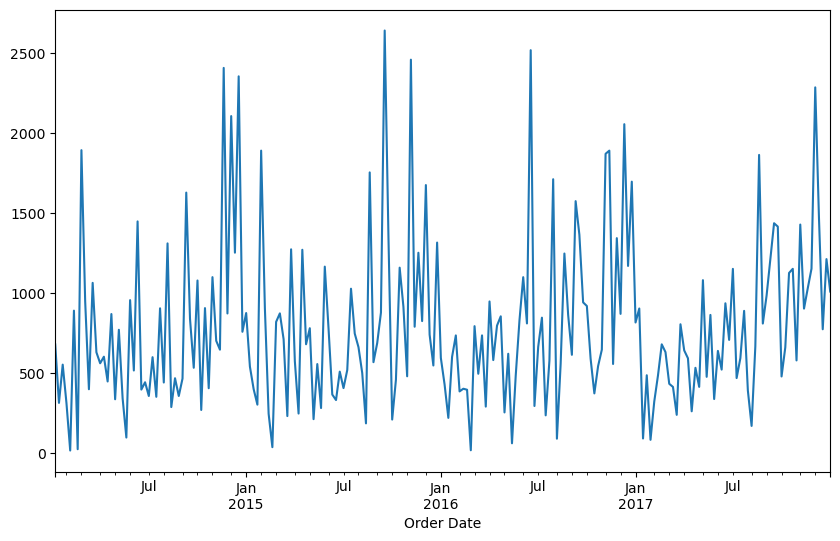

In [25]:
y.plot(figsize=(10, 6))
plt.show() #the graph is not interpretable much so we will go one higher level and convert into month

In [26]:
y = furniture['Sales'].resample("M").mean()

C:\Users\Sana\AppData\Local\Temp\ipykernel_24568\674438680.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  y = furniture['Sales'].resample("M").mean()


In [27]:
print(y.shape)
y

(48,)


Order Date
2014-01-31     480.194231
2014-02-28     367.931600
2014-03-31     857.291529
2014-04-30     567.488357
2014-05-31     432.049188
2014-06-30     695.059242
2014-07-31     601.169500
2014-08-31     457.521656
2014-09-30     992.353367
2014-10-31     769.015437
2014-11-30     980.221486
2014-12-31    1532.298325
2015-01-31     978.328467
2015-02-28     522.395667
2015-03-31     781.236437
2015-04-30     805.822962
2015-05-31     624.996700
2015-06-30     428.565500
2015-07-31     719.706316
2015-08-31     602.412012
2015-09-30    1382.790684
2015-10-31     632.980184
2015-11-30    1286.701354
2015-12-31    1049.355418
2016-01-31     508.182867
2016-02-29     356.868273
2016-03-31     609.575810
2016-04-30     695.373158
2016-05-31     687.265227
2016-06-30     816.910750
2016-07-31     768.736412
2016-08-31     734.307782
2016-09-30    1135.953371
2016-10-31     624.872474
2016-11-30    1271.345152
2016-12-31    1410.719808
2017-01-31     397.602133
2017-02-28     528.179800
2

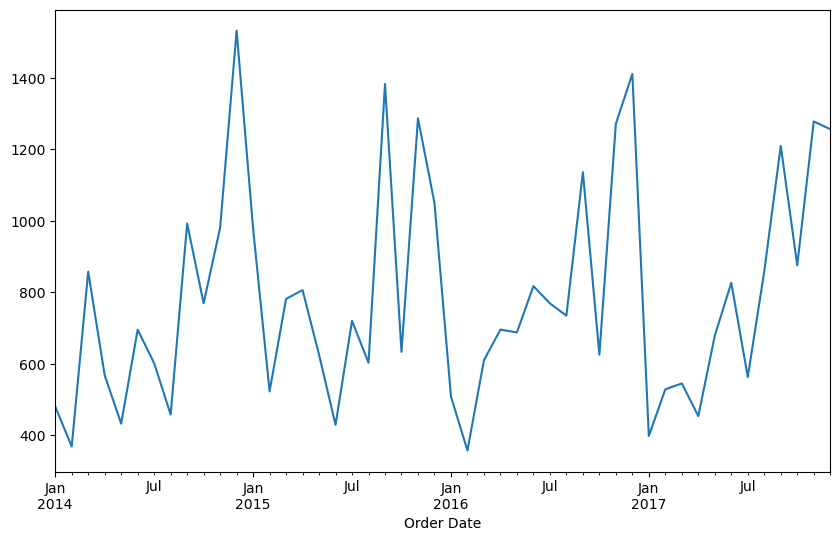

In [28]:
y.plot(figsize=(10, 6))
plt.show() #IT AUTOMATICALLY TAKES INDEXING COL ON X AXIS IN FORM OF TIMELINE AND ON Y AXIS WE HAVE THE ACTUAL VARIABLE

In [29]:
#Splitting the data on the basis of date

In [30]:
train = y.loc[:'2016-12-31'] #taking 3 years data for training #it will be 36 observations as loc is used '2016-12-31' is also included
#train=y.iloc[0:36]
print(train.shape)
train

(36,)


Order Date
2014-01-31     480.194231
2014-02-28     367.931600
2014-03-31     857.291529
2014-04-30     567.488357
2014-05-31     432.049188
2014-06-30     695.059242
2014-07-31     601.169500
2014-08-31     457.521656
2014-09-30     992.353367
2014-10-31     769.015437
2014-11-30     980.221486
2014-12-31    1532.298325
2015-01-31     978.328467
2015-02-28     522.395667
2015-03-31     781.236437
2015-04-30     805.822962
2015-05-31     624.996700
2015-06-30     428.565500
2015-07-31     719.706316
2015-08-31     602.412012
2015-09-30    1382.790684
2015-10-31     632.980184
2015-11-30    1286.701354
2015-12-31    1049.355418
2016-01-31     508.182867
2016-02-29     356.868273
2016-03-31     609.575810
2016-04-30     695.373158
2016-05-31     687.265227
2016-06-30     816.910750
2016-07-31     768.736412
2016-08-31     734.307782
2016-09-30    1135.953371
2016-10-31     624.872474
2016-11-30    1271.345152
2016-12-31    1410.719808
Freq: ME, Name: Sales, dtype: float64

In [31]:
test=y.loc['2017-01-31':]
print(test.shape)
test

(12,)


Order Date
2017-01-31     397.602133
2017-02-28     528.179800
2017-03-31     544.672240
2017-04-30     453.297905
2017-05-31     678.302328
2017-06-30     826.460291
2017-07-31     562.524857
2017-08-31     857.881889
2017-09-30    1209.508583
2017-10-31     875.362728
2017-11-30    1277.817759
2017-12-31    1256.298672
Freq: ME, Name: Sales, dtype: float64

<Axes: title={'center': 'Average Sales'}, xlabel='Order Date'>

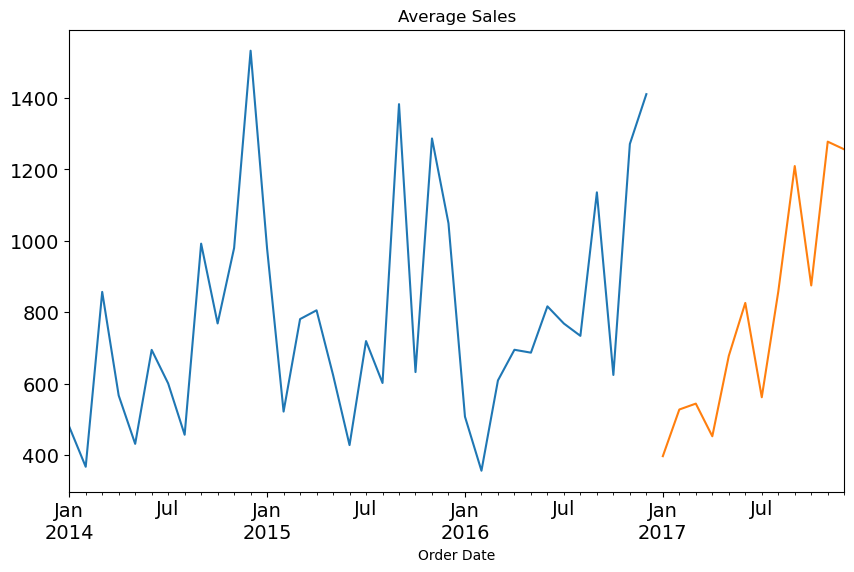

In [32]:
#Plotting data
train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)

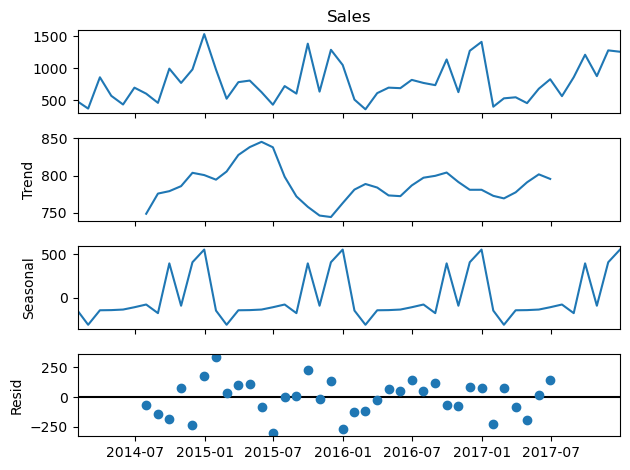

In [33]:
#understanding the components in the data to make the right choice of model to apply
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(y)
decomposition.plot()
plt.show()

## **SIMPLE EXPONENTIAL SMOOTHING**

C:\Users\Sana\anaconda3\lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


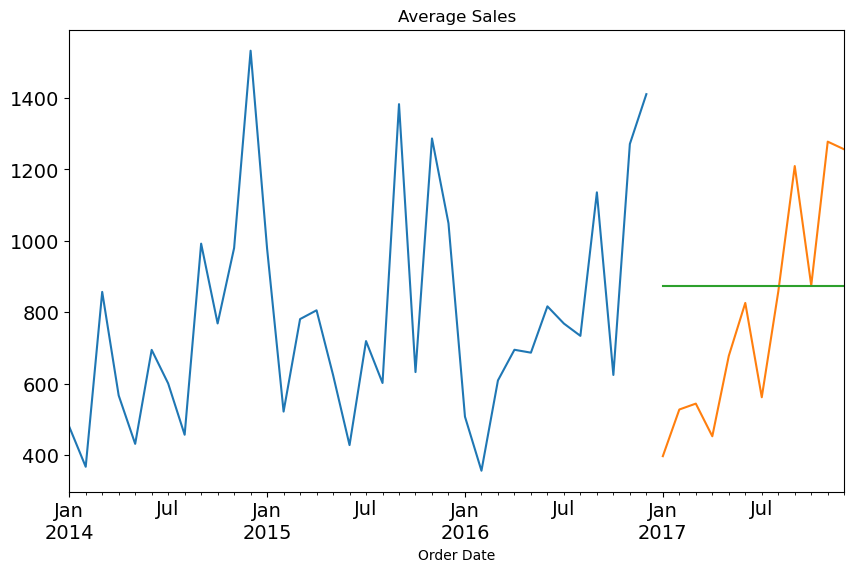

In [34]:
from statsmodels.tsa.api import SimpleExpSmoothing
Exp_Smooth = test.copy() #creating a copy of testing data
#smoothing level=alpha
#alpha value should be in the range of 0 to 1.
#values close to 1 indicate that older values are very less imp compared to the recent values
#values close to 0 indicate that older values are also imp
fit1 = SimpleExpSmoothing(train).fit(smoothing_level=0.1) #taking 0.1 as seasona;lity is there so older values are also imp
Exp_Smooth['SES'] = fit1.forecast(steps=len(test))
 
train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Exp_Smooth['SES'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()


In [35]:
Exp_Smooth.SES #same common mean using smipleexpsmotthing model

2017-01-31    873.671829
2017-02-28    873.671829
2017-03-31    873.671829
2017-04-30    873.671829
2017-05-31    873.671829
2017-06-30    873.671829
2017-07-31    873.671829
2017-08-31    873.671829
2017-09-30    873.671829
2017-10-31    873.671829
2017-11-30    873.671829
2017-12-31    873.671829
Freq: ME, dtype: float64

In [36]:
#AIC is used to compare different models with same Algo but different data/parameters 
#choose the model with lowest AIC value
fit1.aic

418.97075611710727

In [37]:
#RMSE is used to compare different models with same data but different Algos
#choose the model with lowest RMSE value
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test, Exp_Smooth.SES))
print(rmse)

315.0328571018992


## **HOLT'S LINEAR TREND MODEL**

C:\Users\Sana\anaconda3\lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


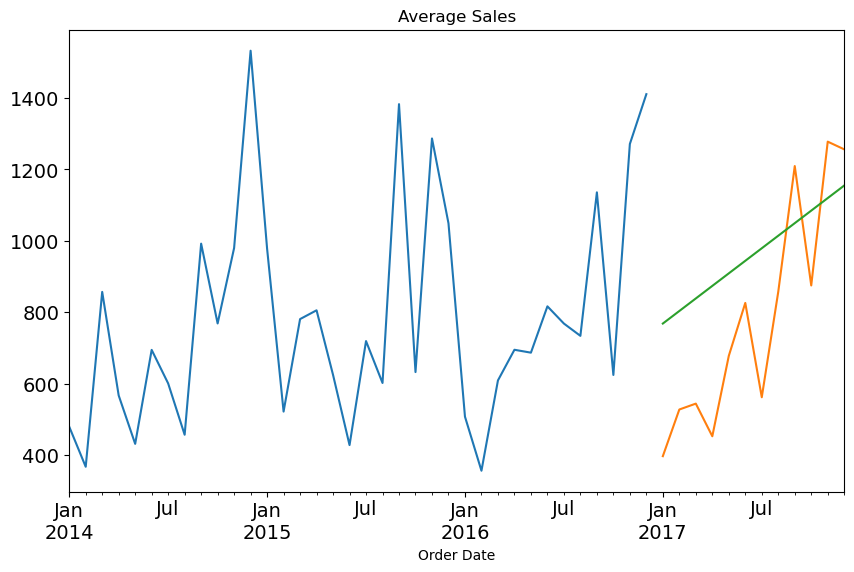

In [38]:
from statsmodels.tsa.api import Holt
Holt_df = test.copy()
#smoothing slope=beta
fit1 = Holt(train).fit(smoothing_level = 0.1,smoothing_trend = 0.4)
Holt_df['Holt_linear'] = fit1.forecast(steps=len(test))
 
train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Holt_df['Holt_linear'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [39]:
fit1.aic

448.64214470173863

In [40]:
Holt_df['Holt_linear']

2017-01-31     768.756943
2017-02-28     803.873271
2017-03-31     838.989600
2017-04-30     874.105929
2017-05-31     909.222257
2017-06-30     944.338586
2017-07-31     979.454914
2017-08-31    1014.571243
2017-09-30    1049.687572
2017-10-31    1084.803900
2017-11-30    1119.920229
2017-12-31    1155.036557
Freq: ME, dtype: float64

In [41]:
#RMSE is used to compare different models with same data but different Algos
#choose the model with lowest RMSE value
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test,Holt_df['Holt_linear']))
print(rmse)

265.7787962083942


In [44]:
#Additive model works best for uniform pattern where there is no trend 
#multiplicate model works best for data where there is a trend 

## **Additive model**

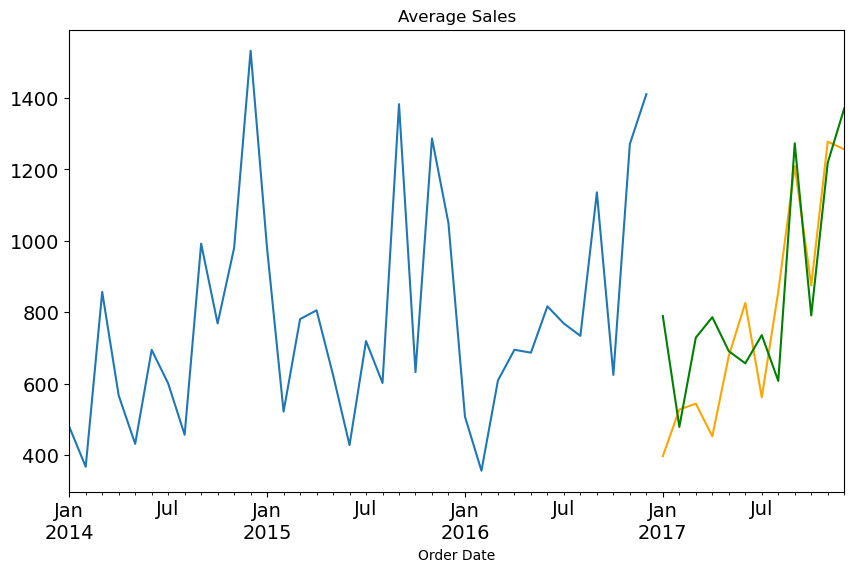

In [45]:
from statsmodels.tsa.api import ExponentialSmoothing
Holt_Winter_df = test.copy()
#seasonalperiods=gamma
fit1 = ExponentialSmoothing(train ,seasonal_periods=12,#the gamma value is 12 as after every 12 obs the pattern starts repeating itself i.e 1 year
                            trend='add',
                            seasonal='add').fit()
Holt_Winter_df['Holt_Winter'] = fit1.forecast(steps=len(test)) #predict on upcoming 12 steps which is actually validation data 
 
train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14, c="orange")
Holt_Winter_df['Holt_Winter'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14, c="green")
plt.show()

In [46]:
fit1.aic

392.39062473148135

In [47]:
Holt_Winter_df['Holt_Winter']

2017-01-31     789.680002
2017-02-28     479.584746
2017-03-31     729.439092
2017-04-30     786.559971
2017-05-31     691.434912
2017-06-30     657.425831
2017-07-31     736.375203
2017-08-31     608.142531
2017-09-30    1273.170681
2017-10-31     791.498413
2017-11-30    1218.795003
2017-12-31    1370.720625
Freq: ME, dtype: float64

In [48]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test,Holt_Winter_df['Holt_Winter']))
print(rmse) #lowest rmse as compared to above 2 models

193.7115308386924


## **Multiplicative model**

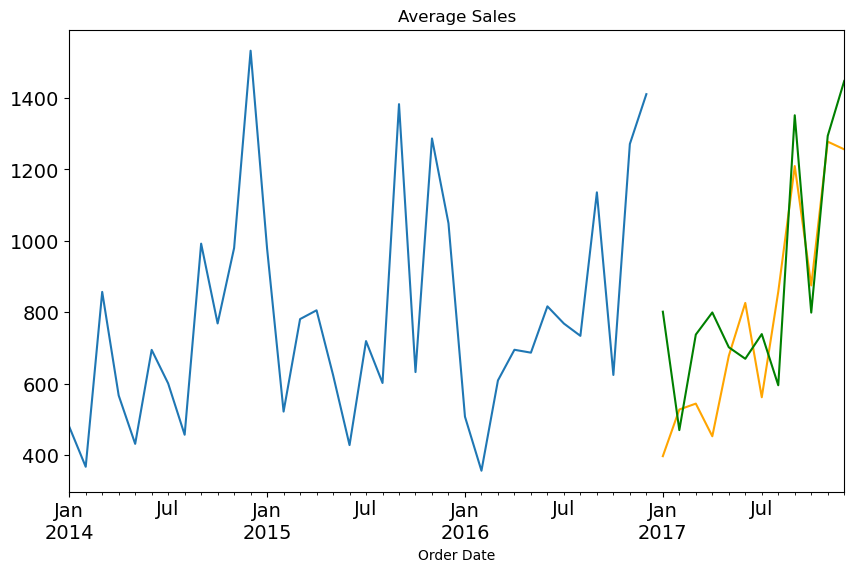

In [49]:
from statsmodels.tsa.api import ExponentialSmoothing
Holt_Winter_df = test.copy()
#seasonalperiods=gamma
fit1 = ExponentialSmoothing(train ,seasonal_periods=12,#the gamma value is 12 as after every 12 obs the pattern starts repeating itself i.e 1 year
                            trend='mul',
                            seasonal='mul').fit()
Holt_Winter_df['Holt_Winter'] = fit1.forecast(steps=len(test)) #predict on upcoming 12 steps which is actually validation data 
 
train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14, c="orange")
Holt_Winter_df['Holt_Winter'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14, c="green")
plt.show()

In [50]:
fit1.aic

395.1079167148456

In [51]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test,Holt_Winter_df['Holt_Winter']))
print(rmse)

206.52870918715436


In [52]:
#Additive model gave the best rmse and aic

In [53]:
#we have nOt done real forecasting till now we want to forecast for one year that is 2018 uptil now we have done forecasting on 2017 i.e validation data

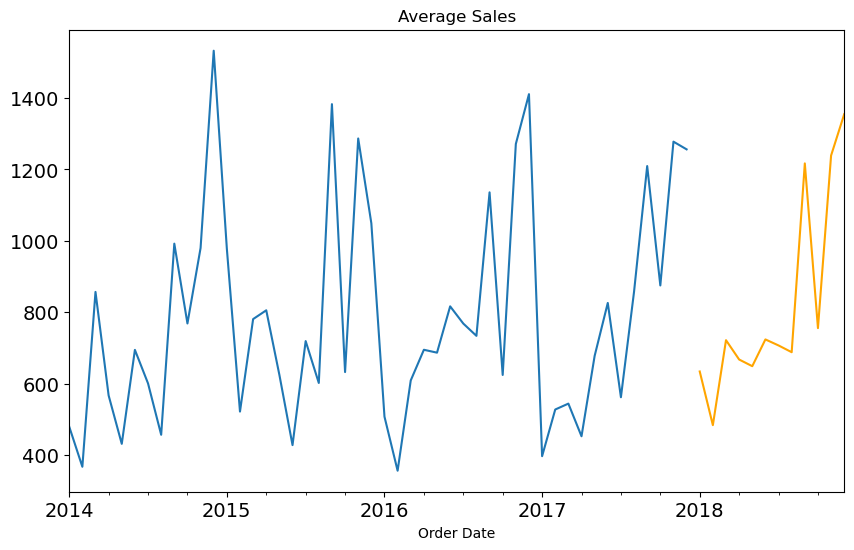

In [54]:
from statsmodels.tsa.api import ExponentialSmoothing

#seasonalperiods=gamma
fit1 = ExponentialSmoothing(y ,seasonal_periods=12,#the gamma value is 12 as after every 12 obs the pattern starts repeating itself i.e 1 year
                            trend='add',
                            seasonal='add').fit()
#Y_predictions = fit1.predict(start=pd.to_datetime('2017-01-31'))
Y_predictions = fit1.forecast(steps=12)
 
 
y.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Y_predictions.plot(figsize=(10,6), title= 'Average Sales', fontsize=14, c="orange")
plt.show()

In [63]:
y

Order Date
2014-01-31     480.194231
2014-02-28     367.931600
2014-03-31     857.291529
2014-04-30     567.488357
2014-05-31     432.049188
2014-06-30     695.059242
2014-07-31     601.169500
2014-08-31     457.521656
2014-09-30     992.353367
2014-10-31     769.015437
2014-11-30     980.221486
2014-12-31    1532.298325
2015-01-31     978.328467
2015-02-28     522.395667
2015-03-31     781.236437
2015-04-30     805.822962
2015-05-31     624.996700
2015-06-30     428.565500
2015-07-31     719.706316
2015-08-31     602.412012
2015-09-30    1382.790684
2015-10-31     632.980184
2015-11-30    1286.701354
2015-12-31    1049.355418
2016-01-31     508.182867
2016-02-29     356.868273
2016-03-31     609.575810
2016-04-30     695.373158
2016-05-31     687.265227
2016-06-30     816.910750
2016-07-31     768.736412
2016-08-31     734.307782
2016-09-30    1135.953371
2016-10-31     624.872474
2016-11-30    1271.345152
2016-12-31    1410.719808
2017-01-31     397.602133
2017-02-28     528.179800
2

In [55]:
Y_predictions

2018-01-31     634.610051
2018-02-28     484.385986
2018-03-31     722.211499
2018-04-30     668.084427
2018-05-31     649.422006
2018-06-30     724.302087
2018-07-31     707.463743
2018-08-31     688.555938
2018-09-30    1216.975767
2018-10-31     755.936340
2018-11-30    1239.032471
2018-12-31    1354.748692
Freq: ME, dtype: float64

In [56]:
Y_predictions.to_excel("TimeSeriesOutput.xlsx", header=["Sales"], index=True)

In [57]:
"""
Box-Jenkins Method:
1.Identification- to identify the optimum values for the parameters PDQ-auto_arima()
2.Estimation-build the model using the optimum values
3.Validation-interpret how good is the model by validation testing
4.Forecasting- forecast for future time periods
"""

'\nBox-Jenkins Method:\n1.Identification- to identify the optimum values for the parameters PDQ-auto_arima()\n2.Estimation-build the model using the optimum values\n3.Validation-interpret how good is the model by validation testing\n4.Forecasting- forecast for future time periods\n'

In [58]:
#p + q + P + Q <=10
#p,q<=3

In [59]:
#pip install pmdarima --user

In [60]:
#pip install pmdarima

## **ARIMA**

In [61]:
import pmdarima as pm

## **IDENTIFICATION**

In [64]:
model = pm.auto_arima(y,start_p=0, max_p=3, d=None, max_d=2,start_q=0, max_q=3,  #3entire line for lower case p,d,q
                      
                      start_P=0,max_P=3, D=None, max_D=2, start_Q=0, max_Q=3,
                      max_order=10, m=12, seasonal=True, information_criterion='aic',
                      test='adf',trace=True,random_state=10)

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,1,0)[12]             : AIC=524.319, Time=0.14 sec
 ARIMA(1,2,0)(1,1,0)[12]             : AIC=503.080, Time=0.21 sec
 ARIMA(0,2,1)(0,1,1)[12]             : AIC=inf, Time=0.29 sec
 ARIMA(1,2,0)(0,1,0)[12]             : AIC=502.081, Time=0.10 sec
 ARIMA(1,2,0)(0,1,1)[12]             : AIC=502.468, Time=0.25 sec
 ARIMA(1,2,0)(1,1,1)[12]             : AIC=inf, Time=0.67 sec
 ARIMA(2,2,0)(0,1,0)[12]             : AIC=499.444, Time=0.13 sec
 ARIMA(2,2,0)(1,1,0)[12]             : AIC=497.244, Time=0.29 sec
 ARIMA(2,2,0)(2,1,0)[12]             : AIC=495.283, Time=0.93 sec
 ARIMA(2,2,0)(3,1,0)[12]             : AIC=497.128, Time=1.57 sec
 ARIMA(2,2,0)(2,1,1)[12]             : AIC=inf, Time=1.52 sec
 ARIMA(2,2,0)(1,1,1)[12]             : AIC=inf, Time=0.72 sec
 ARIMA(2,2,0)(3,1,1)[12]             : AIC=inf, Time=1.56 sec
 ARIMA(1,2,0)(2,1,0)[12]             : AIC=503.589, Time=0.60 sec
 ARIMA(3,2,0)(2,1,0)[12]             : AIC=490.119, T

In [65]:
model.aic() #gave aic for the best model

489.4176261246746

## **ESTIMATION**

In [67]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train,
                order=(3,2,0),seasonal_order=(1,1,0,12)).fit()

## **VALIDATION**

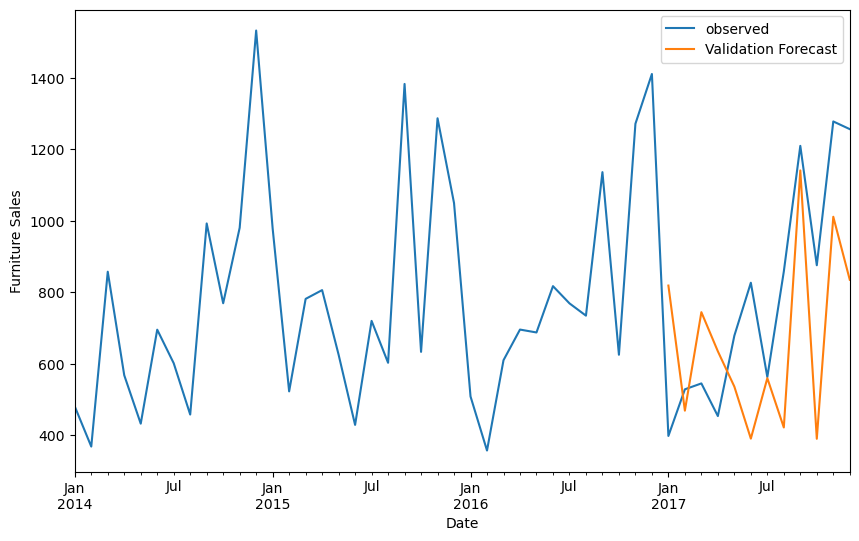

In [68]:
#pred = model.get_prediction(start=pd.to_datetime('2017-01-31')) 
pred = model.get_forecast(steps=12)


plt.figure(figsize=(10,6))
y.plot(label='observed')
pred.predicted_mean.plot(label='Validation Forecast')
plt.xlabel("Date")
plt.ylabel("Furniture Sales")
plt.legend()
plt.show()

In [69]:
pred.predicted_mean

2017-01-31     818.524058
2017-02-28     468.470303
2017-03-31     744.079613
2017-04-30     634.497925
2017-05-31     535.745764
2017-06-30     390.163744
2017-07-31     559.376227
2017-08-31     421.341558
2017-09-30    1140.775307
2017-10-31     389.701041
2017-11-30    1011.052460
2017-12-31     834.732300
Freq: ME, Name: predicted_mean, dtype: float64

In [ ]:
Y_pred = pred.predicted_mean
Y_test = y['2017-01-31':]
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

In [ ]:
pred.predicted_mean.to_excel("TimeSeriesOutput_ARIMA.xlsx",header="Sales",index=True)

In [ ]:
#On this data exponential smoothing is better than ARIMA one  as we see rmse is high than exp smoothing

## **REBUILDING THE MODEL AND FORECASTING**

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(y,
                order=(3,2,0),seasonal_order=(1,1,0,12)).fit()

In [ ]:
#pred = model.get_prediction(start=pd.to_datetime('2017-01-31')) 
pred = model.get_forecast(steps=12)


plt.figure(figsize=(10,6))
y.plot(label='observed')
pred.predicted_mean.plot(label='Validation Forecast')
plt.xlabel("Date")
plt.ylabel("Furniture Sales")
plt.legend()
plt.show()

In [ ]:
pred.predicted_mean #values for 2018

In [ ]:
#as we do not have actual values for 2018 we cannot compare it using rmse

In [ ]:
pred.predicted_mean.to_excel("TimeSeriesOutput_ARIMA.xlsx",header="Sales",index=True)